# Examples of data analysis

This notebook shows how to reuse metadata of image data example from the ABCE Open Data Project.

View the dataset here: https://figshare.com/s/7255e5f83ccc576059bc  (to be updated)

View this notebook on GitHub here: https://github.com/building-energy/ABCE_Open_Data_Project/tree/main/internal_test_datasets/image

## Setup

In [1]:
import requests
import json
import pandas as pd 
from matplotlib import pyplot as plt 
import io

## Get CSV file from figshare

This downloads the fictional image dataset (dataset.csv) file directly from the Figshare data repository.  

In [2]:
csv_download_url='https://figshare.com/ndownloader/files/35875475?private_link=7255e5f83ccc576059bc'  # to be updated
response=requests.get(csv_download_url)
csv_text=response.text
csv_text.split('\n')[:6]

['ï»¿ImageCode ,Location ,Puplisher,Time ,ImageType,Camera,Keywords\r',
 'IMG_0517,Sir Frank  Gibb,Kaicui,23/05/2022 09:54,JPEG,iPhone 13,"Sir Frank  Gibb, ABCE"\r',
 'IMG_0518,green near ABCE,Kaicui,24/05/2022 09:56,JPEG,iPhone 14,ABCE\r',
 'IMG_0519,corridor to Sir Frank Gibb,Kaicui,25/05/2022 09:57,JPEG,iPhone 15,ABCE\r',
 'IMG_0520,rest near ABCE,Kaicui,26/05/2022 09:58,JPEG,iPhone 16,ABCE\r',
 'IMG_0521,John Pickford,Kaicui,27/05/2022 09:58,JPEG,iPhone 17,"John Pickford, WEDC"\r']

## Get metadata.json file from figshare

The CSV data is in CSV on the Web (CSVW) format and so there is an additional accompanying metadata file. The code below downloads this directly from the Figshare data repository.

In [3]:
metadata_json_download_url='https://figshare.com/ndownloader/files/35875472?private_link=7255e5f83ccc576059bc'  # to be updated
response=requests.get(metadata_json_download_url)
metadata_text=response.text
metadata_dict=json.loads(metadata_text)
metadata_dict

{'@context': ['http://www.w3.org/ns/csvw', {'@language': 'en'}],
 'url': 'dataset.csv',
 'tableSchema': {'columns': [{'titles': 'ImageCode',
    'datatype': 'string',
    'ds:description': 'This colums are file names of images and identifiers.'},
   {'titles': 'Location',
    'datatype': 'string',
    'ds:description': 'locactions of images.'},
   {'titles': 'Time',
    'format': 'dd/MM/yyyy HH:mm',
    'datatype': 'dateTime',
    'ds:description': 'created time'},
   {'titles': 'ImageType',
    'datatype': 'string',
    'ds:description': 'image type: JPEG, Tiff, png etc'},
   {'titles': 'Keywords',
    'datatype': 'string',
    'ds:description': 'Images can be searched using these keywords.'}],
  'aboutUrl': '#{ImageCode}'}}

## Read data from CSV text

This reads the text from the downloaded CSV file into a Pandas DataFrame for further analysis.

In [21]:
df=pd.read_csv(io.StringIO(csv_text),
               parse_dates=[0],
               index_col=[0]
              )
df.columns=df.columns.str.strip()
df.head()

,Location,Puplisher,Time,ImageType,Camera,Keywords
ï»¿ImageCode,,,,,,
IMG_0517,Sir Frank Gibb,Kaicui,23/05/2022 09:54,JPEG,iPhone 13,"Sir Frank Gibb, ABCE"
IMG_0518,green near ABCE,Kaicui,24/05/2022 09:56,JPEG,iPhone 14,ABCE
IMG_0519,corridor to Sir Frank Gibb,Kaicui,25/05/2022 09:57,JPEG,iPhone 15,ABCE
IMG_0520,rest near ABCE,Kaicui,26/05/2022 09:58,JPEG,iPhone 16,ABCE
IMG_0521,John Pickford,Kaicui,27/05/2022 09:58,JPEG,iPhone 17,"John Pickford, WEDC"


## Show image samples

This is an example to show image samples for a quick review.

ImageCode : IMG_0517
Location : Sir Frank  Gibb
Time : 23/05/2022 09:54
ImageType : JPEG
Keywords : Sir Frank  Gibb, ABCE


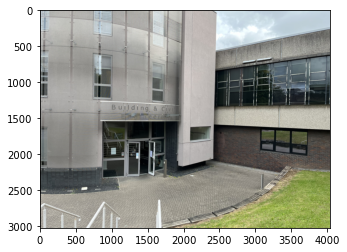

In [29]:
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt

fp = 'https://figshare.com/ndownloader/files/35310949?private_link=7255e5f83ccc576059bc'   # to be updated
imageCode = "IMG_0517"

urllib.request.urlretrieve(fp, imageCode)
image = Image.open(imageCode)

plt.imshow(image)

for i,x in enumerate(metadata_dict['tableSchema']['columns']):
    columns = x.get('titles')
    if i == 0:
        print(columns,':',imageCode)
    else:
        print(columns,':',df.loc[imageCode, columns])
